In [1]:
from IPython.display import clear_output
import SALib
from SALib.sample import saltelli
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from model import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import time
import copy
%matplotlib inline

In [4]:
problem = {
    'num_vars': 6,
    'names': [
     'max_eff', 
     'eutax',
     'neighbor_influence',
     'tax_influence',
     'member_trade_multiplier',
     'tax_distribution'],
    #'bounds': [[0, 2], [0.1, 0.6], [0, 0.2], [0, 0.2], [0.9, 2], [0.8, 1.2]]
    'bounds': [[0, 5], [0, 1], [0, 1], [0, 1], [0.1, 5], [0.1, 3]]
}

#international_trade, max_eff, eutax, neighbor_influence,
#tax_influence, member_trade_multiplier, randomness, eu_strategy):
# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 1
max_steps = 5
distinct_samples = 800

# Set the outputs

# We get all our samples here
param_values = saltelli.sample(problem, distinct_samples, calc_second_order= False)
# READ NOTE BELOW CODE

count = 0
samples = pd.DataFrame(data=param_values,
                       columns=[ 'max_eff', 'eutax','neighbor_influence',
                                'tax_influence','member_trade_multiplier','tax_distribution'])

samples.to_csv('out.csv')

In [5]:
samples

,max_eff,eutax,neighbor_influence,tax_influence,member_trade_multiplier,tax_distribution
0,1.098633,0.096680,0.518555,0.676758,1.473340,2.730957
1,0.229492,0.096680,0.518555,0.676758,1.473340,2.730957
2,1.098633,0.899414,0.518555,0.676758,1.473340,2.730957
3,1.098633,0.096680,0.500977,0.676758,1.473340,2.730957
4,1.098633,0.096680,0.518555,0.069336,1.473340,2.730957
...,...,...,...,...,...,...
6395,0.646973,0.998535,0.230957,0.917480,0.643115,0.681982
6396,0.646973,0.998535,0.294434,0.785645,0.643115,0.681982
6397,0.646973,0.998535,0.294434,0.917480,4.935400,0.681982
6398,0.646973,0.998535,0.294434,0.917480,0.643115,2.746533


In [15]:
problem = {
    'num_vars': 6,
    'names': [
     'max_eff', 
     'eutax',
     'neighbor_influence',
     'tax_influence',
     'member_trade_multiplier',
     'tax_distribution'],
    'bounds': [[0, 2], [0.1, 0.6], [0, 0.2], [0, 0.2], [0.9, 2], [0.8, 1.2]]
}
data = pd.read_csv('data/data_int_on.csv')
print(data.columns)
#data = data['Run'].unique()

data = data.loc[data['international_trade'] == True]
data = data.drop_duplicates(subset=['Run'])
data['gini_coefficient'] = np.where(data['gini_coefficient'] == 'nan', 1, data['gini_coefficient'])
#data['gini_coefficient'] = data['gini_coefficient'].div(2)
data.reindex()

Index(['Run', 'international_trade', 'max_eff', 'eutax', 'neighbor_influence',
       'tax_influence', 'member_trade_multiplier', 'tax_distribution',
       'member_count', 'other_count', 'average_cooperativeness',
       'other_wealth', 'total_wealth', 'member_wealth', 'other_eff',
       'total_eff', 'member_eff', 'gini_coefficient',
       'stdev_agent_cooperativeness'],
      dtype='object')


,Run,international_trade,max_eff,eutax,neighbor_influence,tax_influence,member_trade_multiplier,tax_distribution,member_count,other_count,average_cooperativeness,other_wealth,total_wealth,member_wealth,other_eff,total_eff,member_eff,gini_coefficient,stdev_agent_cooperativeness
0,26733,True,4.051514,0.630615,0.642334,0.538818,1.835815,0.651538,273.0,47.0,0.608589,5.332979e+04,5.537903e+04,5.573183e+04,4.078211,3.520184,3.424114,0.053539,0.603243
1,19095,True,1.341553,0.951904,0.651123,0.069092,0.539038,1.588940,74.0,246.0,-0.553262,2.924584e+04,1.858062e+190,8.034861e+190,1.713755,1.732327,1.794065,0.996875,0.814535
2,5092,True,2.546387,0.390137,0.491699,0.535645,0.346436,0.172217,0.0,320.0,-0.998772,3.454515e+04,3.454515e+04,0.000000e+00,2.343811,2.343811,0.000000,0.274473,0.021939
3,1273,True,4.216309,0.376465,0.798340,0.460449,4.394678,0.302490,302.0,18.0,0.868794,5.317031e+04,8.889289e+04,9.102205e+04,3.986801,3.469385,3.438546,0.027622,0.387221
4,0,True,1.098633,0.096680,0.518555,0.676758,1.473340,2.730957,1.0,319.0,-0.993750,2.594189e+04,2.606544e+04,6.547880e+04,1.573947,1.585550,5.287014,0.197541,0.111629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25571,19090,True,1.341553,0.514893,0.651123,0.069092,0.539038,1.588940,156.0,164.0,-0.058466,2.823308e+04,2.719351e+113,5.578156e+113,1.756127,1.767713,1.779893,0.996875,0.965381
25572,19091,True,1.341553,0.951904,0.915771,0.069092,0.539038,1.588940,118.0,202.0,-0.287762,2.700541e+04,9.499769e+190,2.576208e+191,1.617094,1.650038,1.706434,0.996875,0.931888
25573,19092,True,1.341553,0.951904,0.651123,0.377686,0.539038,1.588940,43.0,277.0,-0.780821,3.164224e+04,1.474001e+188,1.096931e+189,1.684759,1.688794,1.714786,0.996875,0.556685
25574,19093,True,1.341553,0.951904,0.651123,0.069092,0.909888,1.588940,110.0,210.0,-0.336034,3.990262e+04,3.318896e+190,9.654971e+190,1.566307,1.571254,1.580700,0.996875,0.917408


In [16]:
print(data.columns)
for val in data.columns[8:]:
    print(val)

Index(['Run', 'international_trade', 'max_eff', 'eutax', 'neighbor_influence',
       'tax_influence', 'member_trade_multiplier', 'tax_distribution',
       'member_count', 'other_count', 'average_cooperativeness',
       'other_wealth', 'total_wealth', 'member_wealth', 'other_eff',
       'total_eff', 'member_eff', 'gini_coefficient',
       'stdev_agent_cooperativeness'],
      dtype='object')
member_count
other_count
average_cooperativeness
other_wealth
total_wealth
member_wealth
other_eff
total_eff
member_eff
gini_coefficient
stdev_agent_cooperativeness


In [17]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        print('S' + i)
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

member_count
Parameter S1 S1_conf ST ST_conf
max_eff 0.005891 0.048820 0.970094 0.041302
eutax -0.017470 0.050578 1.048523 0.043267
neighbor_influence -0.018024 0.049803 0.974837 0.041772
tax_influence -0.022786 0.049189 1.000123 0.041403
member_trade_multiplier -0.013942 0.049016 0.962100 0.041162
tax_distribution 0.005788 0.050130 1.007142 0.041372
{'S1': array([ 0.00589124, -0.01747037, -0.01802406, -0.0227864 , -0.01394228,
        0.00578833]), 'S1_conf': array([0.04881964, 0.0505779 , 0.04980333, 0.04918902, 0.04901636,
       0.0501299 ]), 'ST': array([0.97009417, 1.04852256, 0.9748369 , 1.0001234 , 0.96210025,
       1.00714209]), 'ST_conf': array([0.04130203, 0.04326685, 0.04177161, 0.04140257, 0.04116215,
       0.0413717 ])}
S1


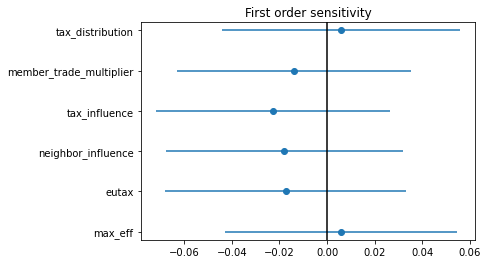

ST


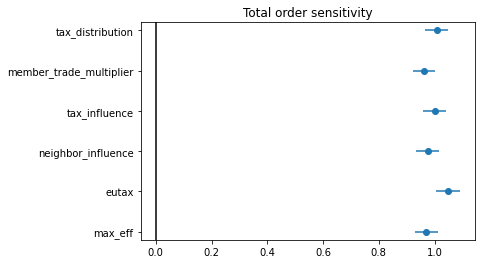

other_count
Parameter S1 S1_conf ST ST_conf
max_eff 0.005891 0.048828 0.970094 0.041246
eutax -0.017470 0.050226 1.048523 0.042020
neighbor_influence -0.018024 0.049435 0.974837 0.041649
tax_influence -0.022786 0.048872 1.000123 0.041529
member_trade_multiplier -0.013942 0.049076 0.962100 0.041745
tax_distribution 0.005788 0.051101 1.007142 0.041465
{'S1': array([ 0.00589124, -0.01747037, -0.01802406, -0.0227864 , -0.01394228,
        0.00578833]), 'S1_conf': array([0.04882824, 0.0502263 , 0.04943488, 0.04887175, 0.04907589,
       0.05110068]), 'ST': array([0.97009417, 1.04852256, 0.9748369 , 1.0001234 , 0.96210025,
       1.00714209]), 'ST_conf': array([0.04124622, 0.04202009, 0.04164868, 0.04152949, 0.04174477,
       0.04146476])}
S1


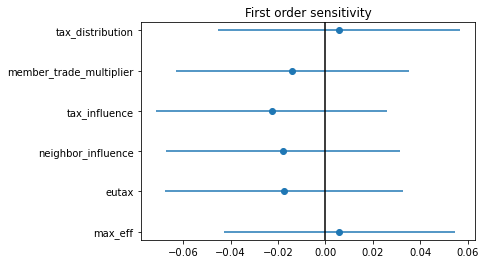

ST


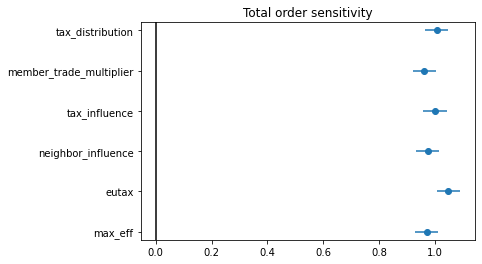

average_cooperativeness
Parameter S1 S1_conf ST ST_conf
max_eff 0.006551 0.049244 0.971458 0.042025
eutax -0.019976 0.050941 1.047704 0.042798
neighbor_influence -0.016325 0.048677 0.976018 0.042509
tax_influence -0.018149 0.049760 0.998371 0.042311
member_trade_multiplier -0.011287 0.049052 0.968074 0.043626
tax_distribution 0.001585 0.049780 1.003592 0.042224
{'S1': array([ 0.00655063, -0.01997581, -0.01632531, -0.01814944, -0.01128693,
        0.00158521]), 'S1_conf': array([0.04924417, 0.05094122, 0.04867741, 0.04975981, 0.04905166,
       0.04978016]), 'ST': array([0.97145804, 1.04770399, 0.97601836, 0.99837148, 0.96807432,
       1.00359188]), 'ST_conf': array([0.04202547, 0.04279845, 0.04250926, 0.04231058, 0.04362573,
       0.04222427])}
S1


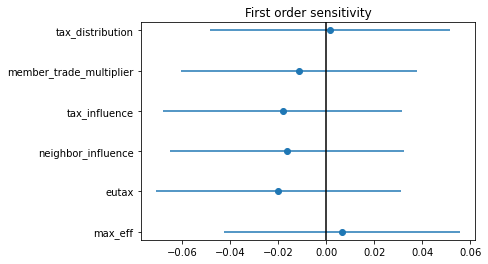

ST


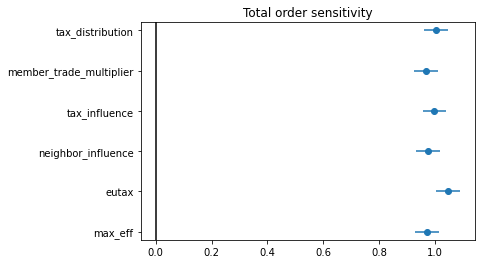

other_wealth
Parameter S1 S1_conf ST ST_conf
max_eff nan nan nan nan
eutax nan nan nan nan
neighbor_influence nan nan nan nan
tax_influence nan nan nan nan
member_trade_multiplier nan nan nan nan
tax_distribution nan nan nan nan
{'S1': array([nan, nan, nan, nan, nan, nan]), 'S1_conf': array([nan, nan, nan, nan, nan, nan]), 'ST': array([nan, nan, nan, nan, nan, nan]), 'ST_conf': array([nan, nan, nan, nan, nan, nan])}
S1


C:\Users\mario\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


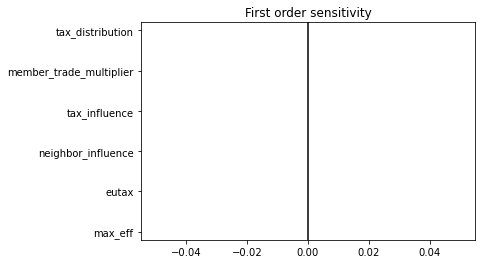

ST


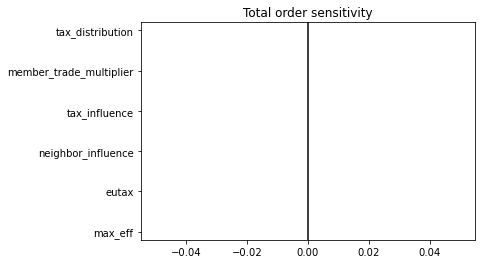

total_wealth
Parameter S1 S1_conf ST ST_conf
max_eff nan nan nan nan
eutax nan nan nan nan
neighbor_influence nan nan nan nan
tax_influence nan nan nan nan
member_trade_multiplier nan nan nan nan
tax_distribution nan nan nan nan
{'S1': array([nan, nan, nan, nan, nan, nan]), 'S1_conf': array([nan, nan, nan, nan, nan, nan]), 'ST': array([nan, nan, nan, nan, nan, nan]), 'ST_conf': array([nan, nan, nan, nan, nan, nan])}
S1


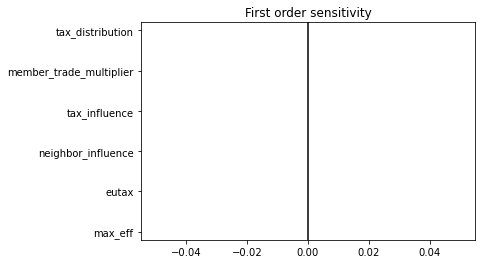

ST


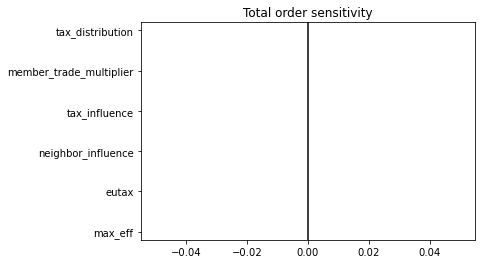

member_wealth
Parameter S1 S1_conf ST ST_conf
max_eff nan nan nan nan
eutax nan nan nan nan
neighbor_influence nan nan nan nan
tax_influence nan nan nan nan
member_trade_multiplier nan nan nan nan
tax_distribution nan nan nan nan
{'S1': array([nan, nan, nan, nan, nan, nan]), 'S1_conf': array([nan, nan, nan, nan, nan, nan]), 'ST': array([nan, nan, nan, nan, nan, nan]), 'ST_conf': array([nan, nan, nan, nan, nan, nan])}
S1


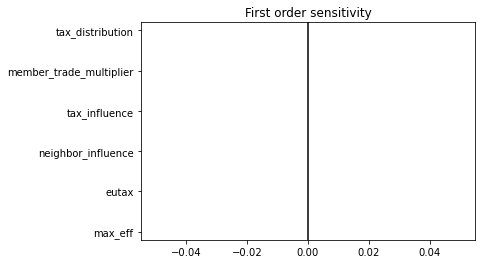

ST


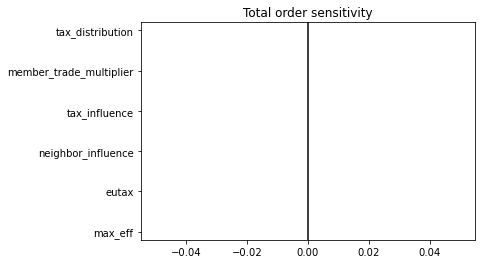

other_eff
Parameter S1 S1_conf ST ST_conf
max_eff -0.007114 0.048675 1.004073 0.065881
eutax -0.010229 0.047545 1.039932 0.070425
neighbor_influence -0.004324 0.046247 1.012782 0.070618
tax_influence 0.003519 0.046699 1.021504 0.073852
member_trade_multiplier -0.000409 0.045748 0.998709 0.066678
tax_distribution 0.000235 0.051073 1.032756 0.071710
{'S1': array([-0.00711401, -0.0102289 , -0.00432381,  0.00351942, -0.00040859,
        0.00023546]), 'S1_conf': array([0.04867546, 0.04754522, 0.04624671, 0.04669881, 0.04574848,
       0.05107345]), 'ST': array([1.00407322, 1.03993198, 1.01278183, 1.02150352, 0.99870936,
       1.03275571]), 'ST_conf': array([0.06588127, 0.07042546, 0.07061774, 0.07385165, 0.06667838,
       0.07171023])}
S1


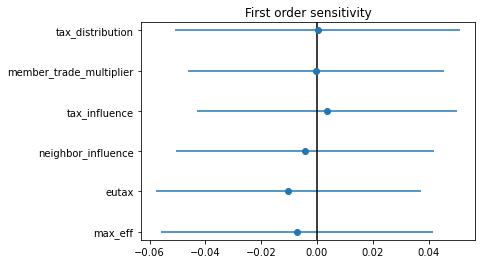

ST


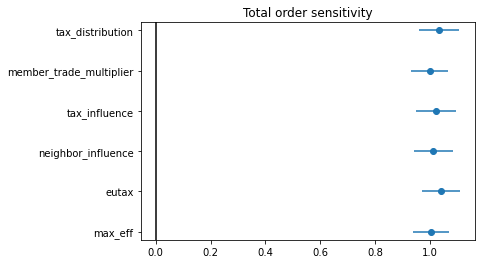

total_eff
Parameter S1 S1_conf ST ST_conf
max_eff -0.022074 0.048921 1.020317 0.040967
eutax -0.011988 0.048315 1.013022 0.042056
neighbor_influence -0.025115 0.048085 1.006552 0.041689
tax_influence -0.014123 0.048464 1.003254 0.040429
member_trade_multiplier -0.001952 0.047888 0.982514 0.040451
tax_distribution 0.007861 0.048298 1.012163 0.041959
{'S1': array([-0.02207423, -0.01198843, -0.02511499, -0.01412283, -0.00195189,
        0.00786119]), 'S1_conf': array([0.04892058, 0.048315  , 0.0480854 , 0.04846441, 0.04788837,
       0.04829831]), 'ST': array([1.02031747, 1.01302201, 1.00655153, 1.00325363, 0.98251401,
       1.01216345]), 'ST_conf': array([0.04096708, 0.04205641, 0.0416889 , 0.04042924, 0.04045126,
       0.04195907])}
S1


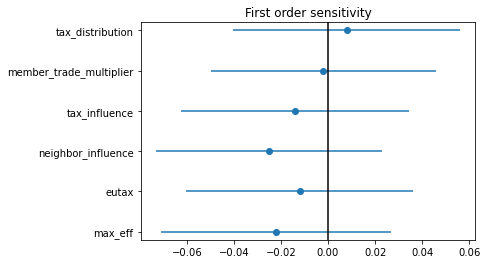

ST


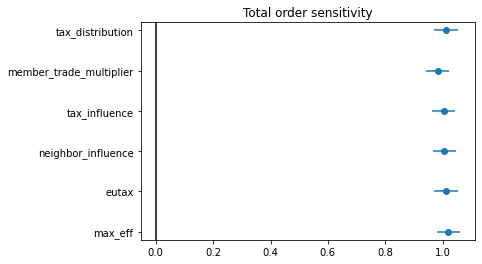

member_eff
Parameter S1 S1_conf ST ST_conf
max_eff -0.021879 0.051287 0.968669 0.057223
eutax -0.022975 0.049904 1.042122 0.061077
neighbor_influence -0.031123 0.048469 0.923184 0.054961
tax_influence -0.030372 0.049744 1.041711 0.062271
member_trade_multiplier -0.015825 0.048811 0.997380 0.061825
tax_distribution -0.008037 0.049381 1.021285 0.061048
{'S1': array([-0.02187913, -0.0229748 , -0.03112263, -0.03037209, -0.01582533,
       -0.00803677]), 'S1_conf': array([0.05128733, 0.04990376, 0.04846944, 0.04974407, 0.04881061,
       0.04938064]), 'ST': array([0.96866927, 1.04212206, 0.92318365, 1.04171127, 0.99737952,
       1.02128518]), 'ST_conf': array([0.05722254, 0.0610767 , 0.05496111, 0.06227069, 0.06182538,
       0.06104795])}
S1


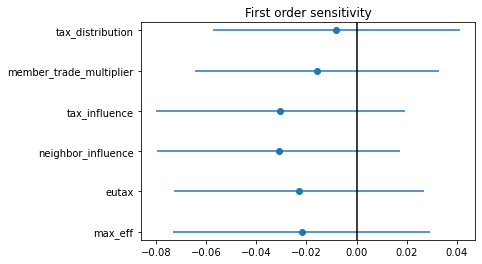

ST


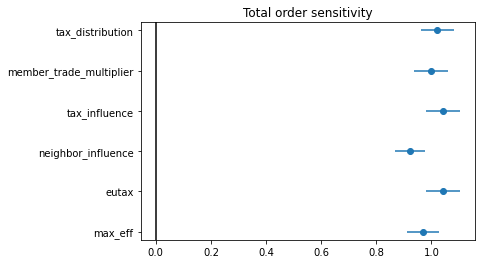

gini_coefficient
Parameter S1 S1_conf ST ST_conf
max_eff nan nan nan nan
eutax nan nan nan nan
neighbor_influence nan nan nan nan
tax_influence nan nan nan nan
member_trade_multiplier nan nan nan nan
tax_distribution nan nan nan nan
{'S1': array([nan, nan, nan, nan, nan, nan]), 'S1_conf': array([nan, nan, nan, nan, nan, nan]), 'ST': array([nan, nan, nan, nan, nan, nan]), 'ST_conf': array([nan, nan, nan, nan, nan, nan])}
S1


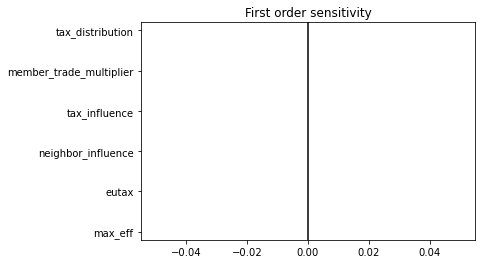

ST


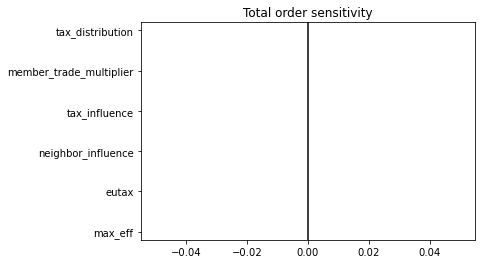

stdev_agent_cooperativeness
Parameter S1 S1_conf ST ST_conf
max_eff -0.000389 0.047511 1.001656 0.038852
eutax 0.022957 0.049708 1.010885 0.038297
neighbor_influence 0.031691 0.047410 0.959668 0.038244
tax_influence 0.028089 0.048396 0.995252 0.039102
member_trade_multiplier 0.001681 0.047449 0.959374 0.038478
tax_distribution 0.012637 0.048534 0.993055 0.037998
{'S1': array([-0.00038923,  0.02295747,  0.03169142,  0.02808863,  0.00168058,
        0.0126373 ]), 'S1_conf': array([0.0475108 , 0.04970795, 0.04740991, 0.04839595, 0.04744887,
       0.04853361]), 'ST': array([1.00165591, 1.01088476, 0.95966826, 0.99525236, 0.95937391,
       0.99305519]), 'ST_conf': array([0.0388523 , 0.03829735, 0.03824397, 0.03910172, 0.03847798,
       0.03799821])}
S1


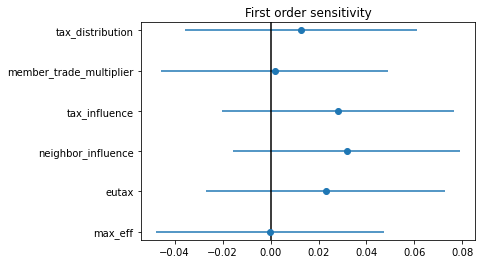

ST


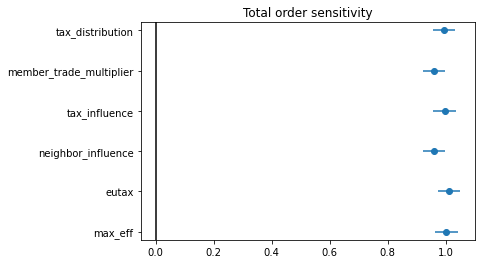

In [18]:
for col_name in data.columns[8:]:
    print(col_name)
    S_i = sobol.analyze(problem, data[col_name].values, print_to_console=True, calc_second_order=False, num_resamples= 6400)
    print(S_i)

    for Si in [S_i]:
        # First order
        plot_index(Si, problem['names'], '1', 'First order sensitivity')
        plt.show()

        # Total order
        plot_index(Si, problem['names'], 'T', 'Total order sensitivity')
        plt.show()